In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from google.colab import files

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!ls "/content/drive/MyDrive/ThermoDataBase"

'Control Group'  'DM Group'   logo.png	'Plantar Thermogram Database.xlsx'


In [26]:
base_path = "/content/drive/MyDrive/ThermoDataBase"
print("DM Group Files:", os.listdir(os.path.join(base_path, "DM Group")))
print("Control Group Files:", os.listdir(os.path.join(base_path, "Control Group")))

DM Group Files: ['DM058_F', 'DM096_M', 'DM052_F', 'DM010_M', 'DM116_F', 'DM090_F', 'DM077_F', 'DM073_F', 'DM012_F', 'DM016_F', 'DM098_M', 'DM056_F', 'DM094_F', 'DM069_F', 'DM037_F', 'DM084_F', 'DM063_F', 'DM108_F', 'DM004_M', 'DM023_F', 'DM088_M', 'DM042_F', 'DM102_F', 'DM106_F', 'DM029_F', 'DM048_F', 'DM080_F', 'DM006_F', 'DM074_F', 'DM093_F', 'DM036_M', 'DM025_M', 'DM067_F', 'DM115_F', 'DM099_F', 'DM051_F', 'DM030_F', 'DM011_F', 'DM032_M', 'DM053_M', 'DM034_F', 'DM111_F', 'DM091_M', 'DM076_M', 'DM055_F', 'DM070_F', 'DM097_F', 'DM107_M', 'DM045_F', 'DM060_F', 'DM120_F', 'DM087_F', 'DM028_M', 'DM043_M', 'DM101_F', 'DM026_M', 'DM089_F', 'DM031_F', 'DM079_M', 'DM018_M', 'DM114_F', 'DM020_F', 'DM092_F', 'DM014_F', 'DM112_M', 'DM105_F', 'DM075_F', 'DM118_M', 'DM062_M', 'DM110_F', 'DM050_F', 'DM027_M', 'DM086_F', 'DM044_F', 'DM100_F', 'DM035_F', 'DM071_F', 'DM054_F', 'DM061_F', 'DM033_M', 'DM039_M', 'DM065_F', 'DM121_F', 'DM059_F', 'DM021_F', 'DM008_M', 'DM040_F', 'DM082_F', 'DM046_M', 'DM1

In [27]:
# Load Excel File
file_path = "/content/drive/MyDrive/ThermoDataBase/Plantar Thermogram Database.xlsx"
xls = pd.ExcelFile(file_path)

In [28]:
def load_excel_data():
    file_path = os.path.join(base_path, "Plantar Thermogram Database.xlsx")
    xls = pd.ExcelFile(file_path)
    columns = [
        "Subject", "Gender", "Age", "Weight", "Height", "IMC",
        "Right_General", "Right_LCA", "Right_LPA", "Right_MCA", "Right_MPA", "Right_TCI",
        "Left_General", "Left_LCA", "Left_LPA", "Left_MCA", "Left_MPA", "Left_TCI"
    ]
    control_df = pd.read_excel(xls, sheet_name="Control Group").iloc[1:, :18]
    dm_df = pd.read_excel(xls, sheet_name="DM Group").iloc[1:, :18]
    control_df.columns = columns
    dm_df.columns = columns
    temp_columns = columns[6:]
    control_df[temp_columns] = control_df[temp_columns].apply(pd.to_numeric, errors="coerce")
    dm_df[temp_columns] = dm_df[temp_columns].apply(pd.to_numeric, errors="coerce")
    return control_df, dm_df, temp_columns

control_df, dm_df, temp_columns = load_excel_data()

In [29]:
# Compute Statistics
summary_control = control_df[temp_columns].describe().T[['mean', 'min', 'max']]
summary_dm = dm_df[temp_columns].describe().T[['mean', 'min', 'max']]
print("Control Group Temperature Summary:\n", summary_control)
print("\nDiabetes Group Temperature Summary:\n", summary_dm)

Control Group Temperature Summary:
                     mean        min        max
Right_General  26.711409  22.387564  29.606375
Right_LCA      26.623413  23.119065  30.083457
Right_LPA      26.412679  21.630086  29.959270
Right_MCA      27.068318  23.507049  30.209695
Right_MPA      26.754804  21.533399  30.542911
Right_TCI       1.453265   0.118606   3.788465
Left_General   26.684395  22.028821  29.451460
Left_LCA       26.565537  22.807526  30.127613
Left_LPA       26.386755  21.351016  29.656146
Left_MCA       26.998726  23.128482  30.171988
Left_MPA       26.709402  21.271377  29.794159
Left_TCI        1.438643   0.166865   3.860400

Diabetes Group Temperature Summary:
                     mean        min        max
Right_General  29.789569  21.522825  35.600973
Right_LCA      29.321013  22.177977  35.319347
Right_LPA      29.939596  20.840009  35.911442
Right_MCA      29.551101  22.472009  35.125757
Right_MPA      30.106955  21.184798  35.543087
Right_TCI       4.103050   0.1889

In [30]:
# Load Angiosome Temperature Data
def load_angiosome_data(group_folder):
    angiosomes = ["LCA", "LPA", "MCA", "MPA", "TCI"]
    angiosome_data = {}
    for angiosome in angiosomes:
        csv_path = os.path.join(group_folder, f"{angiosome}.csv")
        if os.path.exists(csv_path):
            angiosome_data[angiosome] = pd.read_csv(csv_path)
    return angiosome_data

dm_angiosome_data = load_angiosome_data("DM Group")
control_angiosome_data = load_angiosome_data("Control Group")

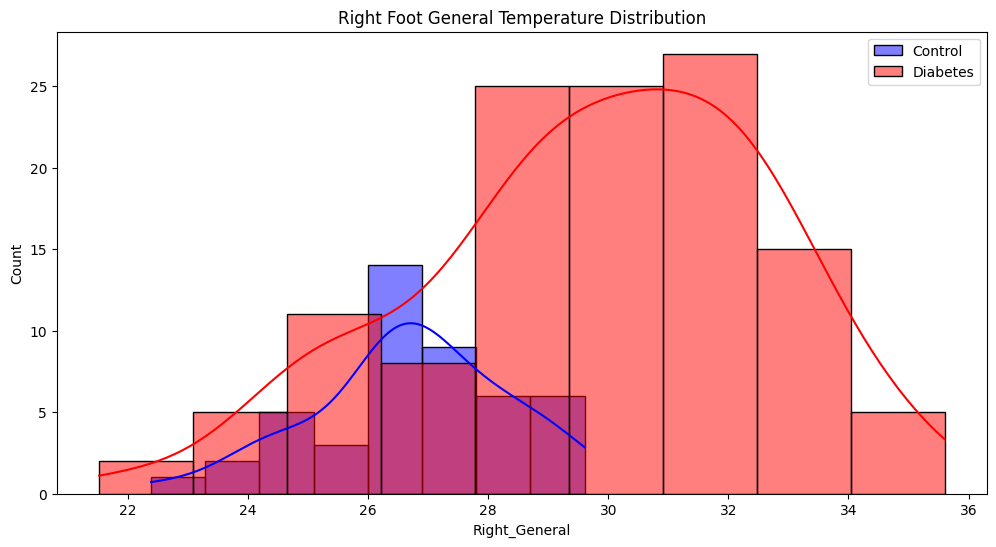

In [31]:
# Plot Histograms
# Visualize Temperature Distributions
plt.figure(figsize=(12, 6))
sns.histplot(control_df['Right_General'], color='blue', label='Control', kde=True)
sns.histplot(dm_df['Right_General'], color='red', label='Diabetes', kde=True)
plt.title('Right Foot General Temperature Distribution')
plt.legend()
plt.show()

<ipython-input-32-5b0ffe1454ff>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Temperature', data=combined_df, palette={'Control': 'blue', 'Diabetes': 'red'})


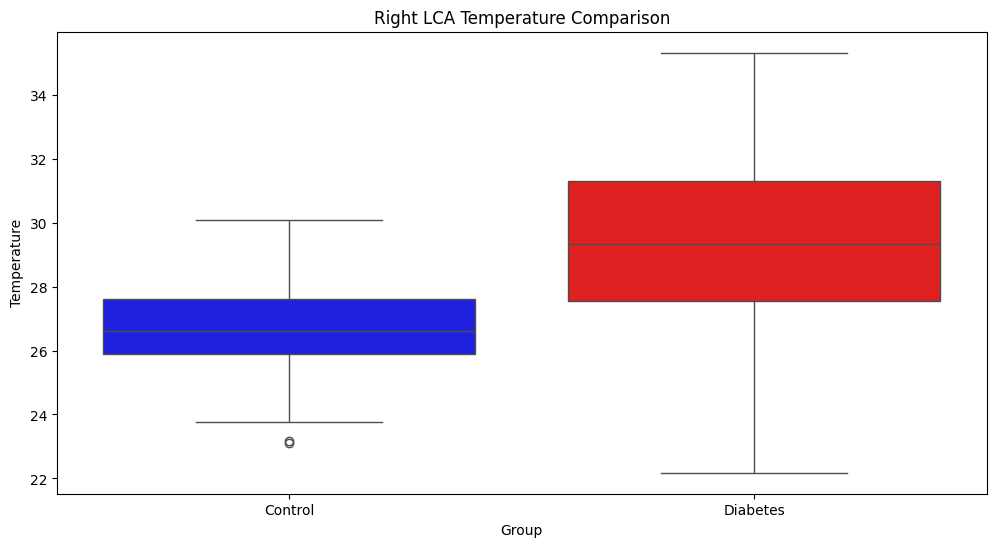

In [32]:
# Creating a new DataFrame with a categorical column for grouping
combined_df = pd.concat([
    pd.DataFrame({'Temperature': control_df['Right_LCA'], 'Group': 'Control'}),
    pd.DataFrame({'Temperature': dm_df['Right_LCA'], 'Group': 'Diabetes'})
])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Temperature', data=combined_df, palette={'Control': 'blue', 'Diabetes': 'red'})
plt.title('Right LCA Temperature Comparison')
plt.show()


In [33]:
# Image Processing (Extract RGB Histograms & Detect Hotspots)
def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])
    return hist_r, hist_g, hist_b, image_rgb

In [34]:
def detect_hotspots(image_rgb):
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(image_gray, 150, 255, cv2.THRESH_BINARY)
    return thresh

In [39]:
image_path = "/content/drive/MyDrive/ThermoDataBase/DM Group/DM001_M/DM001_M_L.png"

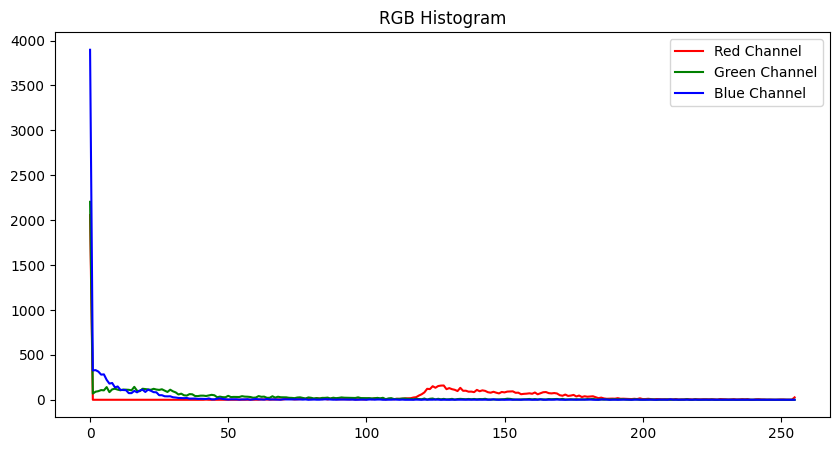

In [40]:
hist_r, hist_g, hist_b, image_rgb = process_image(image_path)

plt.figure(figsize=(10, 5))
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.title('RGB Histogram')
plt.legend()
plt.show()

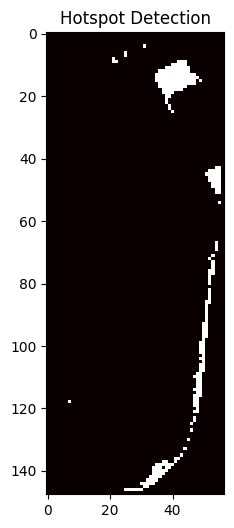

In [41]:
hotspot_image = detect_hotspots(image_rgb)
plt.figure(figsize=(6, 6))
plt.imshow(hotspot_image, cmap='hot')
plt.title('Hotspot Detection')
plt.show()


In [43]:
## Conclusion: We could explore on this more

In [45]:
# Define the dataset path
dataset_path = "/content/drive/MyDrive/ThermoDataBase"  # Update this with your actual path

# Function to load images from a specific angiosome
def load_images(group, angiosome):
    images = []
    group_path = os.path.join(dataset_path, group)  # diabetic or control
    for patient in os.listdir(group_path):
        angiosome_path = os.path.join(group_path, patient, "Angiosomes", angiosome)
        if os.path.exists(angiosome_path):
            for img_file in os.listdir(angiosome_path):
                img_path = os.path.join(angiosome_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Keep original color
                if img is not None:
                    images.append(img)
    return images

# Load images for a specific angiosome
angiosome = "LCA"  # Change this to LPA, MCA, or MPA
diabetic_images = load_images("DM Group", angiosome)
control_images = load_images("Control Group", angiosome)

In [46]:
def plot_images(images, title, num=5):
    plt.figure(figsize=(12, 6))
    for i in range(min(num, len(images))):
        plt.subplot(1, num, i + 1)
        plt.imshow(cv2.applyColorMap(images[i], cv2.COLORMAP_JET))  # Use thermal colormap
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Visualize diabetic vs control images
plot_images(diabetic_images, "Diabetic Group - " + angiosome)
plot_images(control_images, "Control Group - " + angiosome)


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Mean Temperature Difference: -0.0097
Standard Deviation of Difference: 0.1945
Min Difference: -0.9011, Max Difference: 0.9373


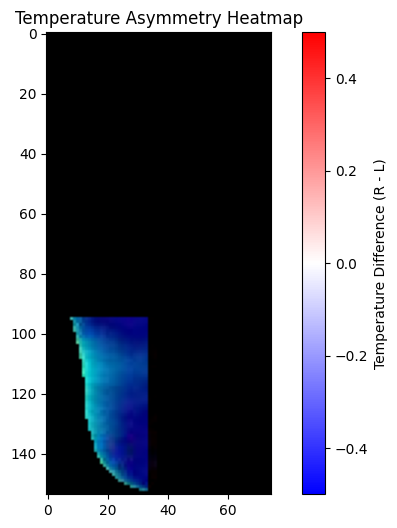

In [63]:
left_img_path = r"/content/drive/MyDrive/ThermoDataBase/DM Group/DM004_M/Angiosoms/DM004_M_L_LCA.png"
right_img_path = r"/content/drive/MyDrive/ThermoDataBase/DM Group/DM004_M/Angiosoms/DM004_M_R_LCA.png"

# Load images without changing color encoding
left_img = cv2.imread(left_img_path, cv2.IMREAD_UNCHANGED)  # Preserve infrared values
right_img = cv2.imread(right_img_path, cv2.IMREAD_UNCHANGED)

# Normalize intensity values (scale between 0 and 1 for fair comparison)
left_img = left_img.astype(np.float32) / 255.0
right_img = right_img.astype(np.float32) / 255.0

# Get the smallest width and height to resize both images
min_height = min(left_img.shape[0], right_img.shape[0])
min_width = min(left_img.shape[1], right_img.shape[1])

# Resize both images to the same dimensions
left_resized = cv2.resize(left_img, (min_width, min_height), interpolation=cv2.INTER_AREA)
right_resized = cv2.resize(right_img, (min_width, min_height), interpolation=cv2.INTER_AREA)

# Compute pixel-wise difference (Right - Left)
temp_diff = right_resized.astype(np.float32) - left_resized.astype(np.float32)

# Compute statistics
mean_diff = np.mean(temp_diff)
std_diff = np.std(temp_diff)
min_diff = np.min(temp_diff)
max_diff = np.max(temp_diff)

print(f"Mean Temperature Difference: {mean_diff:.4f}")
print(f"Standard Deviation of Difference: {std_diff:.4f}")
print(f"Min Difference: {min_diff:.4f}, Max Difference: {max_diff:.4f}")

# Display temperature asymmetry as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(temp_diff, cmap='bwr', vmin=-0.5, vmax=0.5)  # Blue = cooler, Red = warmer
plt.colorbar(label="Temperature Difference (R - L)")
plt.title("Temperature Asymmetry Heatmap")
plt.show()
